<a href="https://colab.research.google.com/github/glamacles/notebooks/blob/main/local_emulators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Local Emulators
- Emulators can have different levels of generality
- Some emulators are tailored to a specific scenario such as a specific glacier
- Here we'll look at emulators that are aimed at being fairly general stand ins for expensive models
- These emulators take advantage of the local spatial relationships between variables of interest


# Instructed Glacier Model (IGM)
- The Instructed Glacier Model ([IGM](https://www.cambridge.org/core/journals/journal-of-glaciology/article/deep-learning-speeds-up-ice-flow-modelling-by-several-orders-of-magnitude/748E962A103D2AF45F4CA8823C88C0C0)) drastically speeds up simulations of mountain glaciers
- Estimates ice flow velocity from geometry, basal traction coefficient, and rate factor
- Approximates ice flow velocity using a CNN
- All inputs / outputs defined on grid
- IGM resolves vertical velocity profile with 10 vertical spatial layers

<div>
<img src="https://github.com/glamacles/notebooks/blob/main/images/local_emulators/igm1.png?raw=1" width="800"/>
</div>


| Variable              | Symbol |
| :---------------- | :------: |
| Ice Thickness       |   $h$   |
| Surface Elevation         |   $s$   |
| Rate Factor   |  $A$   |
| Basal Traction Coefficient |  $ c$  |
| Grid Resolution |  $H$  |
| Velocity X-component | $u$ |
| Velocity Y-component | $v$ |

<div>
<img src="https://github.com/glamacles/notebooks/blob/main/images/local_emulators/igm2.png?raw=1" width="800"/>
</div>


## PINN Loss function
- Solving for ice velocity can be posed as minimization problem
- The varitional principle for momentum balance is given by
  $$ J(\pmb{u}) = \int_{\Omega} \left [ \frac{2n}{n+1} \eta (\dot{\epsilon}^2) \dot{\epsilon}^2 + \rho g \pmb{u} \cdot \nabla{s}   \right ] \; d \Omega + \int_{\Gamma_b} \frac{c}{m+1} (\pmb{u} \cdot \pmb{u})^{\frac{m+1}{2}} \; d \Gamma $$
- Taking the first variation $\delta J$ yields the weak form of the first order ice flow equations
- This serves as a natural way of defining a loss function for training the CNN
- In IGM the strain tensor $\dot{\epsilon}$ is simplified using the first order Blatter-Pattyn approxmiation

## Training

- IGM has been geared toward simulating mountain glaciers and ice fields
- Hence training data involves simulations on mountainous terrain in the European Alps generated by CsFlow or PISM
- IGM does not need training data per se, but it does need a wide variety of input scenarios to train a generallly applicable emulator
- IGM has a collection of pretrained emulators
- It also allows for dynamic retraining to improve accuracy if needed

## Features

- Includes mass transport model and glacial erosion model
- Recently IGM has been augmented with a thermal model that models vertical advection / diffusion
- It is now integrated with the OGGM shop for downloading glcier data like thickness and velocity based on RGIId
- Includes some cool plotting routines for 3d plots

<div>
<img src="https://github.com/glamacles/notebooks/blob/main/images/local_emulators/igm_training.png?raw=1" width="900"/>
</div>


# Quick IGM Demo
- IGM is being developed rapidly, meaning some aspects of the model may not be stable
- However, here's a quick example of how to use IGM:






In [ ]:
!git clone https://github.com/jouvetg/igm.git

Cloning into 'igm'...
remote: Enumerating objects: 4361, done.
remote: Counting objects: 100% (737/737), done.
remote: Compressing objects: 100% (267/267), done.
remote: Total 4361 (delta 511), reused 646 (delta 456), pack-reused 3624
Receiving objects: 100% (4361/4361), 39.55 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (2946/2946), done.


In [ ]:
cd igm

/content/igm


In [ ]:
pip install -e .

Obtaining file:///content/igm
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.8/418.8 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
cd tests/examples/quick-demo/

/content/igm/tests/examples/quick-demo


In [ ]:
import json

# Take a look at the json param file
f = open('params.json')
data = json.load(f)
# This demo simulates Aletsch glacier in Switzerland, pulling data form the IGM shop
print(json.dumps(data, indent=2))

{
  "modules_preproc": [
    "oggm_shop"
  ],
  "modules_process": [
    "clim_oggm",
    "smb_oggm",
    "iceflow",
    "time",
    "thk"
  ],
  "modules_postproc": [
    "write_ncdf",
    "plot2d",
    "print_info",
    "print_comp"
  ],
  "clim_oggm_clim_trend_array": [
    [
      "time",
      "delta_temp",
      "prec_scal"
    ],
    [
      1900,
      0.0,
      1.0
    ],
    [
      2020,
      0.0,
      1.0
    ],
    [
      2100,
      4.0,
      1.0
    ]
  ],
  "oggm_RGI_ID": "RGI60-11.01450",
  "time_start": 1800.0,
  "time_end": 2100.0,
  "plt2d_live": true,
  "iflo_init_slidingco": 0.25
}


In [ ]:
!igm_run --plt2d_live false

2024-06-10 19:05:57.441529: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 19:05:57.441594: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 19:05:57.441644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-10 19:05:57.451120: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 19:06:03.197118: I tensorflow/c

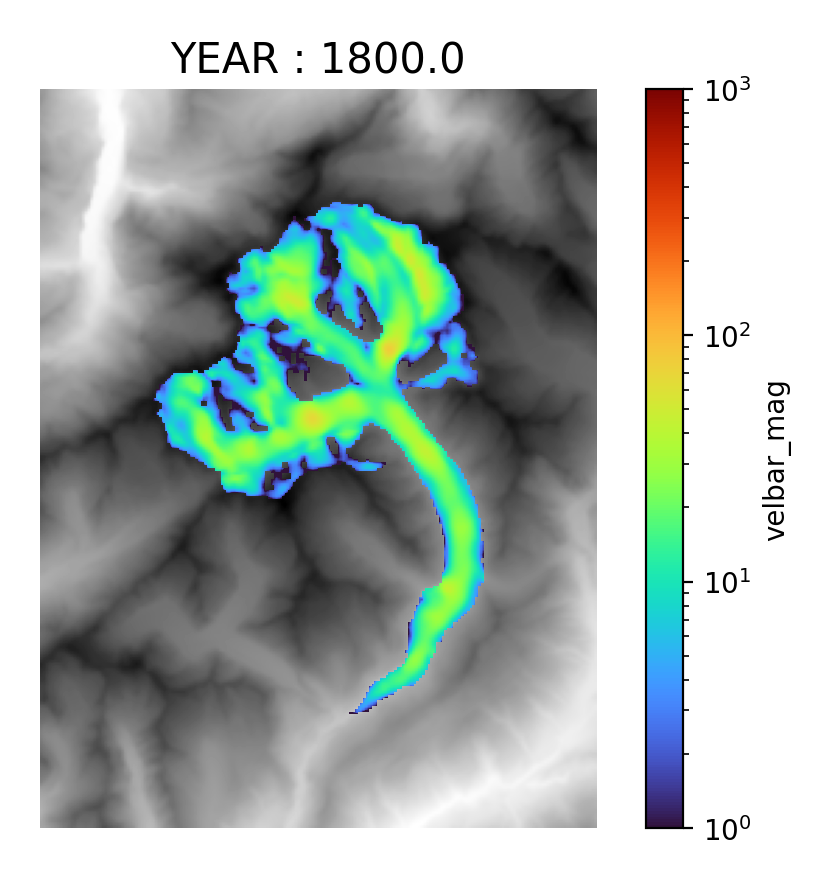

In [ ]:
 # Show the output
from IPython.display import Image
Image('/content/igm/tests/examples/quick-demo/velbar_mag-1800.0.png')

# An Alternative Approach: Graph Neural Network Emulator

- IGM is designed for an ice flow model designed on a uniform grid
- Many models, however, are defined on an unstructured mesh
- This motivates using an alternative approach that can handle models defined on non-uniform meshes

## Graphs
- A graph $G=(V,E)$ is a tuple consisting of a set $V$ of vertices / nodes and a set $E$ of edges

<div>
<img src="https://github.com/glamacles/notebooks/blob/main/images/local_emulators/graph.png?raw=1" width="700"/>
</div>

- A fine element mesh has a clear graph structure
- Mesh vertices $\to$ graph vertices
- Mesh edges $\to$ graph edges

# Graph Neural Network
- Graph neural networks (GNN's) operate on graphs
- Inputs / outputs of a GNN are defined on graphs
- A GNN takes in a graph structure $G = (V, E)$ as well as node and edge features
- Notation $\pmb{v_i}$ refers to a vector feature defined on node $i$
- Notation $\pmb{e_{ij}}$ refers to a vector features defined on edge connecting nodes $i$ and $j$
- Currently there are many GNN architectures for different applications
- A popular Python package for GNN's is [Pytorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) which has implementations of many different architectures

## GNN Architecture
- For physics application GNN's using graph convolutions have proved useful
- These architectures use multiple graph convolution layers analagous to CNN's
- Very informative breakdown of graph convolutions [here](https://distill.pub/2021/understanding-gnns/)
- We use a GNN architecture based on [Pfaff 2021](https://arxiv.org/pdf/2010.03409) which implements very general graph convolutions using message passing

<div>
<img src="https://github.com/glamacles/notebooks/blob/main/images/local_emulators/algorithm.png?raw=1" width="700"/>
</div>

- Graph attention networks have also proved useful
- This uses an attention mechanism similar to a transformer to attend to features from specific neighboring nodes

# Emulating SpecEIS
- Here, we apply a GNN to emulate the SpecEIS model using a compatible finite elements [formulation](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10221861)
- Note a few notational difference from IGM
- SpecEIS is a first order model that solves for the depth averaged velocity $u_{bar}$ and deformational velocity $u_{def}$
- SpecEIS uses a combination of finite elements including:
- MTW elements for velocity, bed, and surface gradients
- DG0 elements for bed and thickness
- CG1 elements for basal traction coefficient
- Implemented in Firedrake


| Variable              | Symbol | Degree of Freedom | FEM Space |
| :---------------- | :------: | ----: | ---- |
| Bed       |   $B$   | 1 per cell | DG0 |
| Surface          |   $S$   | 1 per cell | DG0 |
| Surface gradient   |  $\nabla S$   | 3 per edge | MTW |
| Bed gradient|  $ \nabla B$   | 3 per edge | MTW |
| Basal Traction Coefficient |  $ \beta^2$   | 1 per vertex | CG1 |
| Depth Averaged Velocity       |   $u_{bar}$   | 3 per edge | MTW |
| Deformational Velocity       |   $u_{def}$   | 3 per edge | MTW |

## Graph Representation

- All of the necessary input / output variables including necessary mesh geometric variables can be represented using edge features in  a GNN!
- Feature vector for the edge connecting nodes $i$ and $j$:
$$ \pmb{e_{ij}} = \begin{bmatrix}
    H_{ij} \\
    \beta^2_{ij}\\
    \pmb{\nabla S_{ij}} \\
    \pmb{\nabla B_{ij}} \\
    \ell_{ij} \\
    \pmb{d_{ij}}^+ \\
    \pmb{d_{ij}}^- \\
\end{bmatrix}
$$

| Feature      | Description | Size |
| :----------- | :------: | ----: |
| $H_{ij}$       |  Average of $H$ over edge $i,j$ | 1 |
| $\beta^2_{ij}$       |  Average of $\beta^2$ over edge $i,j$ | 1 |
| $\nabla S_{ij}$       |  Gradient of $S$ in MTW space | 3 |
| $\nabla B_{ij}$       |  Gradient of $B$ in MTW space | 3 |
|  $\ell_{ij}$       |  Length of edge | 1 |
|   $\pmb{d_{ij}}^+$      |  Vector from edge to cell midpoint | 2 |
|   $\pmb{d_{ij}}^-$      |  Vector from edge to cell midpoint | 2 |

- Outputs of the emulator are degrees of freedom for $u_{bar}$ and $u_{def}$ in MTW space (3 per edge)
- Hence, we get a direct finite element representation of the solution that can be used in Firedrake

## Training

- GNN emulator is trained on mountainous terrain in Montana
- We run 400 year simulations on a number of mountainous regions
- Loss function integrates difference between solved and emulated glacier velocity
- Solved velcty is given by finite element solution
$$
\int_{\Omega} \pmb{r} \cdot \pmb{r} d \Omega = \int (\pmb{u}_{solved} - \pmb{u}_{emulated}) \cdot (\pmb{u}_{solved} - \pmb{u}_{emulated}) d \Omega
$$


# Mass Continuity
- Because the GNN emulator directly outputs coefficients for the FEM solution for ice flow, we can easily apply a traditional scheme for solving mass conservation
- Example of using the GNN emulator for a time dependent problem

<div>
<img src="https://github.com/glamacles/notebooks/blob/main/images/local_emulators/out.gif?raw=1" width="700"/>
</div>

- Super smooth segue into project description here

# Another GNN Ice Emulator
- [Rahnemoonfar and Koo](https://arxiv.org/pdf/2402.05291) use a similar approach
- They create a GNN emulator of ISSM for Pine Island Glacier (PIG)
- Training data is generated by conducting simulations of PIG for a variety of basal melting rates
- Input Features:

| Feature      | Description |
| :----------- | :------:|
| $x$      |  x spatial coordinate |
| $y$      |  y spatial coordinate|
|  $\dot{m}$     |  Basal melt rate |

- Output Features:

| Feature   &nbsp; &nbsp; &nbsp; &nbsp;   | Description |
| :-------------- | :------:|
| $H(x,y,t)$      | Ice thickness at point |
| $u(x,y,t)$      | Velocity at point |

- While this emulator is similar in principle, it is less general purpose